Tugas 1


1. Load Data

In [1]:
# Load data
import pandas as pd
data = pd.read_csv(r'D:\File untuk kuliah\Semester-5\Pembelajaran Mesin\Praktek\MachineLearning_Smst5_2025\Week9_JS09\Assets\voice.csv')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


1. Buatlah model klasifikasi dengan menggunakan kNN untuk mengklasifikasikan jenis suara male dan female pada dataset voice.csv.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Use the dataframe variable that was loaded earlier ('data').
# Only map string labels to integers if labels are still strings.
if data['label'].dtype == 'object':
	data['label'] = data['label'].map({'male': 0, 'female': 1})

# 3. Pisahkan fitur dan target
X = data.drop('label', axis=1)
y = data['label']

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Latih model kNN dasar
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# 7. Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9810725552050473

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       297
           1       0.98      0.98      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634


Confusion Matrix:
 [[291   6]
 [  6 331]]


2. Eksperimen Fitur Paling Optimal

Gunakan SelectKBest dengan metode f_classif untuk memilih fitur terbaik.

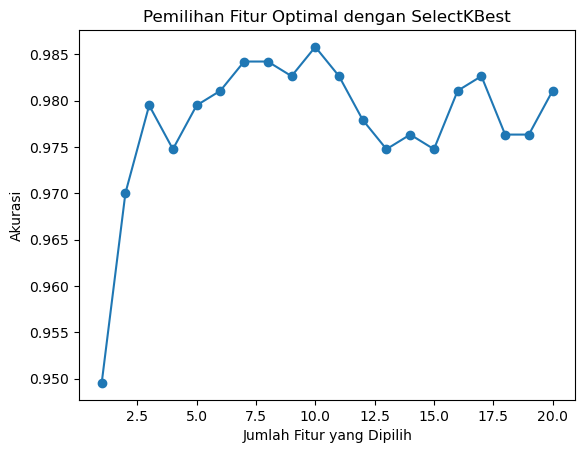

Jumlah fitur optimal: 10, Akurasi: 0.9858
Fitur terbaik: ['meanfreq', 'sd', 'median', 'Q25', 'IQR', 'sp.ent', 'sfm', 'centroid', 'meanfun', 'maxdom']


In [5]:
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np

# Uji berbagai jumlah fitur
accuracies = []
k_values = range(1, X.shape[1] + 1)

for k in k_values:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_new = selector.fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

# Visualisasi hasil
import matplotlib.pyplot as plt

plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Jumlah Fitur yang Dipilih')
plt.ylabel('Akurasi')
plt.title('Pemilihan Fitur Optimal dengan SelectKBest')
plt.show()

# Cari fitur terbaik
best_k = np.argmax(accuracies) + 1
print(f"Jumlah fitur optimal: {best_k}, Akurasi: {accuracies[best_k-1]:.4f}")

# Tampilkan nama fitur terpilih
selector = SelectKBest(score_func=f_classif, k=best_k)
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]
print("Fitur terbaik:", list(selected_features))


3. Menentukan Nilai k Terbaik pada kNN

Setelah fitur optimal dipilih, cari nilai k terbaik untuk kNN.

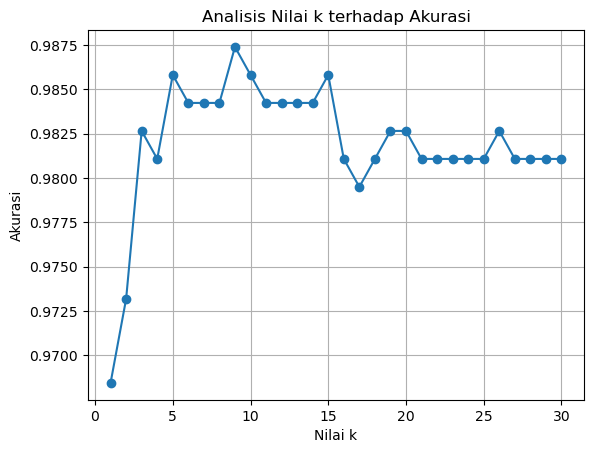

Nilai k terbaik: 9, Akurasi: 0.9874


In [6]:
# Gunakan fitur terbaik
X_selected = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Uji nilai k
k_range = range(1, 31)
acc_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc_scores.append(accuracy_score(y_test, y_pred))

# Visualisasi
plt.plot(k_range, acc_scores, marker='o')
plt.title('Analisis Nilai k terhadap Akurasi')
plt.xlabel('Nilai k')
plt.ylabel('Akurasi')
plt.grid(True)
plt.show()

best_k_value = k_range[np.argmax(acc_scores)]
print(f"Nilai k terbaik: {best_k_value}, Akurasi: {max(acc_scores):.4f}")
